In [1]:
import sys
import os
import time
searchPath=os.path.abspath('..')
sys.path.append(searchPath)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from knn.knn_base import KNN
from knn.knn_kdtree import KNNKdTree
from utils.data_generater import random_points

In [3]:
def getData(number):
    data = random_points(2, number)
    label = [0] * (number // 2) + [1] * (number // 2)
    return np.array(data), np.array(label)

In [4]:
dataList = []
labelList = []
for num in [500, 1000, 2000, 5000, 10000, 50000, 400000]:
    data, label = getData(num)
    dataList.append(data)
    labelList.append(label)

In [5]:
models = {"knn":KNN(), "kdtree":KNNKdTree()}

In [6]:
for data, label in zip(dataList, labelList):
    for name, model in models.items():
        startTime = time.time()
        model.fit(data, label)
        for i in range(5):
            model.predict([0.3, 0.4])
        print("model = %s, dataNum = %s, takeTime = %s"%(name, len(data), round(time.time() - startTime, 5)))

model = knn, dataNum = 500, takeTime = 0.02907
model = kdtree, dataNum = 500, takeTime = 0.01373
model = knn, dataNum = 1000, takeTime = 0.04717
model = kdtree, dataNum = 1000, takeTime = 0.01168
model = knn, dataNum = 2000, takeTime = 0.09721
model = kdtree, dataNum = 2000, takeTime = 0.01754
model = knn, dataNum = 5000, takeTime = 0.34005
model = kdtree, dataNum = 5000, takeTime = 0.03784
model = knn, dataNum = 10000, takeTime = 0.4659
model = kdtree, dataNum = 10000, takeTime = 0.10174
model = knn, dataNum = 50000, takeTime = 2.14072
model = kdtree, dataNum = 50000, takeTime = 0.47442
model = knn, dataNum = 400000, takeTime = 15.223
model = kdtree, dataNum = 400000, takeTime = 6.6497


In [7]:
def plot_knn(data, label, point):
    data = np.array(data)
    label = np.array(label)
    for l in set(label):
        plt.scatter(data[label == l, 0], data[label == l, 1], label=str(l))
    plt.plot(point[0], point[1], 'bo', label='test_point')
    plt.legend()

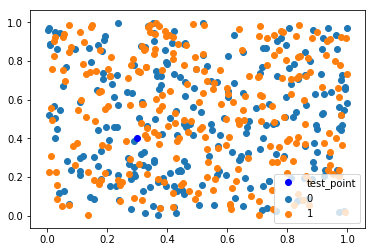

In [8]:
plot_knn(dataList[0], labelList[0], (0.3, 0.4))